In [80]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
# Check the Python version
import sys
if sys.version.startswith("3."):
  print("You are running Python 3. Good job :)")
else:
  print("This notebook requires Python 3.\nIf you are using Google Colab, go to Runtime > Change runtime type and choose Python 3.")

You are running Python 3. Good job :)


In [82]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
if IN_COLAB:
  # Clone the entire repo to access the files.
  !git clone -l -s https://github.com/epfml/OptML_course.git cloned-repo
  %cd cloned-repo/labs/ex02/template/

# Load the data

In [83]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
b, A = build_model_data(x, weight)

In [84]:
print('Number of samples n = ', b.shape[0])
print('Dimension of each sample d = ', A.shape[1])

Number of samples n =  10000
Dimension of each sample d =  2


# Least Squares Estimation
Least squares estimation is one of the fundamental machine learning algorithms. Given an $ n \times d $ matrix $A$ and a $ n \times 1$ vector $b$, the goal is to find a vector $x \in \mathbb{R}^d$ which minimizes the objective function $$f(x) = \frac{1}{2n} \sum_{i=1}^{n} (a_i^\top x - b_i)^2 = \frac{1}{2n} \|Ax - b\|^2 $$

In this exercise, we will try to fit $x$ using Least Squares Estimation. 

One can see the function is $L$ smooth with $L =\frac1n\|A^T A\|  = \frac1n\|A\|^2$ (Lemma 2.3 for the first equality, and a few manipulations for the second).

# Computing the Objective Function
Fill in the `calculate_objective` function below:

In [85]:
def calculate_objective(Axmb):
    """Calculate the mean squared error for vector Axmb = Ax - b."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute mean squared error
    return np.sum(Axmb**2)
    # ***************************************************

# Compute smoothness constant $L$

To compute the spectral norm of A you can use np.linalg.norm(A, 2)

In [86]:
def calculate_L(b, A):
    """Calculate the smoothness constant for f"""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute ||A.T*A||
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute L = smoothness constant of f
    # ***************************************************
    n=len(b)
    return np.linalg.norm(A,2)**2/n

# Gradient Descent

Please fill in the functions `compute_gradient` below:

In [87]:
def compute_gradient(b, A, x):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and objective
    Axmb = A@x-b
    n = len(b)
    grad = A.T @ Axmb/n
    # ***************************************************
    return grad, Axmb

Please fill in the functions `gradient_descent` below:

In [88]:
def gradient_descent(b, A, initial_x, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store x and objective func. values
    xs = [initial_x]
    objectives = []
    x = initial_x
    L = calculate_L(b,A)
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and objective function
        # ***************************************************
        grad, Axmb = compute_gradient(b,A,x)
        obj = calculate_objective(Axmb)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update x by a gradient descent step
        # ***************************************************
        x = x - gamma*grad
        # store x and objective function value
        xs.append(x)
        objectives.append(obj)
        print("Gradient Descent({bi}/{ti}): objective={l}".format(
              bi=n_iter, ti=max_iters - 1, l=obj))

    return objectives, xs

Test your gradient descent function with a naive step size through gradient descent demo shown below:

In [89]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50

gamma = 0.1

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives_naive, gradient_xs_naive = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=55844734.25518335
Gradient Descent(1/49): objective=45292701.120600075
Gradient Descent(2/49): objective=36745554.281587616
Gradient Descent(3/49): objective=29822365.341987535
Gradient Descent(4/49): objective=24214582.300911464
Gradient Descent(5/49): objective=19672278.037639838
Gradient Descent(6/49): objective=15993011.584389824
Gradient Descent(7/49): objective=13012805.757257303
Gradient Descent(8/49): objective=10598839.037279971
Gradient Descent(9/49): objective=8643525.994098332
Gradient Descent(10/49): objective=7059722.4291212
Gradient Descent(11/49): objective=5776841.541489724
Gradient Descent(12/49): objective=4737708.022508227
Gradient Descent(13/49): objective=3896009.8721332173
Gradient Descent(14/49): objective=3214234.3703294587
Gradient Descent(15/49): objective=2661996.2138684127
Gradient Descent(16/49): objective=2214683.3071349664
Gradient Descent(17/49): objective=1852359.8526808745
Gradient Descent(18/49): objective=1558877.85

Time Visualization

In [90]:
from ipywidgets import IntSlider, interact
from grid_search import *

def plot_figure(n_iter):
    # Generate grid data for visualization (parameters to be swept and best combination)
    grid_x0, grid_x1 = generate_w(num_intervals=10)
    grid_objectives = grid_search(b, A, grid_x0, grid_x1)
    obj_star, x0_star, x1_star = get_best_parameters(grid_x0, grid_x1, grid_objectives)
    
    fig = gradient_descent_visualization(
        gradient_objectives_naive, gradient_xs_naive, grid_objectives, grid_x0, grid_x1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs_naive)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

Try doing gradient descent with a better learning rate

In [91]:
# Define the parameters of the algorithm.
max_iters = 50

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: a better learning rate using the smoothness of f
# ***************************************************
gamma = 1/calculate_L(b,A)

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=55844734.25518335
Gradient Descent(1/49): objective=307717.757376588
Gradient Descent(2/49): objective=307717.757376588
Gradient Descent(3/49): objective=307717.757376588
Gradient Descent(4/49): objective=307717.757376588
Gradient Descent(5/49): objective=307717.757376588
Gradient Descent(6/49): objective=307717.757376588
Gradient Descent(7/49): objective=307717.757376588
Gradient Descent(8/49): objective=307717.757376588
Gradient Descent(9/49): objective=307717.757376588
Gradient Descent(10/49): objective=307717.757376588
Gradient Descent(11/49): objective=307717.757376588
Gradient Descent(12/49): objective=307717.757376588
Gradient Descent(13/49): objective=307717.757376588
Gradient Descent(14/49): objective=307717.757376588
Gradient Descent(15/49): objective=307717.757376588
Gradient Descent(16/49): objective=307717.757376588
Gradient Descent(17/49): objective=307717.757376588
Gradient Descent(18/49): objective=307717.757376588
Gradient Descent(19/4

Time visualization with a better learning rate

In [92]:
def plot_figure(n_iter):
    # Generate grid data for visualization (parameters to be swept and best combination)
    grid_x0, grid_x1 = generate_w(num_intervals=10)
    grid_objectives = grid_search(b, A, grid_x0, grid_x1)
    obj_star, x0_star, x1_star = get_best_parameters(grid_x0, grid_x1, grid_objectives)
    
    fig = gradient_descent_visualization(
        gradient_objectives, gradient_xs, grid_objectives, grid_x0, grid_x1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# Loading more complex data
The data is taken from https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength 

In [93]:
data = np.loadtxt("Concrete_Data.csv",delimiter=",")

A = data[:,:-1]
b = data[:,-1]
A, mean_A, std_A = standardize(A)

In [94]:
n=b.shape[0]
d=A.shape[1]
print('Number of samples n = ', n)
print('Dimension of each sample d = ', d)

Number of samples n =  1030
Dimension of each sample d =  8


# Running gradient descent

## Assuming bounded gradients
Assume we are moving in a bounded region $\|x\| \leq 25$ containing all iterates (and we assume $\|x-x^\star\| \leq 25$ as well, for simplicity). Then by $\nabla f(x) = \frac{1}{n}A^\top (Ax - b)$, one can see that $f$ is Lipschitz over that bounded region, with Lipschitz constant $\|\nabla f(x)\| \leq \frac{1}{n} (\|A^\top A\|\|x\| + \|A^\top b\|)$

In [95]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: Compute the bound on the gradient norm
# ***************************************************
grad_norm_bound = np.linalg.norm(A,2)*25/n

Fill in the learning rate assuming bounded gradients

In [96]:
max_iters = 50

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: Compute learning rate based on bounded gradient
# ***************************************************
gamma = 25/(np.sqrt(max_iters)*calculate_L(b,A))

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
bd_gradient_objectives, bd_gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()


# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

# Averaging the iterates as is the case for bounded gradients case
bd_gradient_objectives_averaged = []
for i in range(len(bd_gradient_xs)):
    if i > 0:
        bd_gradient_xs[i] = (i * bd_gradient_xs[i-1] + bd_gradient_xs[i])/(i + 1)
    grad, err = compute_gradient(b, A, bd_gradient_xs[i])
    obj = calculate_objective(err)
    bd_gradient_objectives_averaged.append(obj)

Gradient Descent(0/49): objective=1608589.3194
Gradient Descent(1/49): objective=1566802.0875213996
Gradient Descent(2/49): objective=1601221.3735112962
Gradient Descent(3/49): objective=1771980.002484974
Gradient Descent(4/49): objective=2750470.570112402
Gradient Descent(5/49): objective=8879318.743683964
Gradient Descent(6/49): objective=48074275.637819886
Gradient Descent(7/49): objective=299792889.259684
Gradient Descent(8/49): objective=1917738643.0706446
Gradient Descent(9/49): objective=12318969016.241016
Gradient Descent(10/49): objective=79187210086.00871
Gradient Descent(11/49): objective=509077856527.06036
Gradient Descent(12/49): objective=3272814687169.831
Gradient Descent(13/49): objective=21040690038992.35
Gradient Descent(14/49): objective=135269154020862.75
Gradient Descent(15/49): objective=869636200486139.2
Gradient Descent(16/49): objective=5590832140077820.0
Gradient Descent(17/49): objective=3.5943080678002708e+16
Gradient Descent(18/49): objective=2.310756282793

## Gradient descent using smoothness
Fill in the learning rate using smoothness of the function

In [97]:
max_iters = 50


# ***************************************************
# INSERT YOUR CODE HERE
# TODO: a better learning rate using the smoothness of f
# ***************************************************
gamma = 1/calculate_L(b,A)

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=1608589.3194
Gradient Descent(1/49): objective=1486300.8274136996
Gradient Descent(2/49): objective=1455975.7783689671
Gradient Descent(3/49): objective=1446461.8783659479
Gradient Descent(4/49): objective=1442658.3154793829
Gradient Descent(5/49): objective=1440749.0202057152
Gradient Descent(6/49): objective=1439582.618582006
Gradient Descent(7/49): objective=1438756.0068379738
Gradient Descent(8/49): objective=1438111.0913902302
Gradient Descent(9/49): objective=1437579.3264737932
Gradient Descent(10/49): objective=1437127.4665092193
Gradient Descent(11/49): objective=1436737.1031394051
Gradient Descent(12/49): objective=1436396.5468463483
Gradient Descent(13/49): objective=1436097.4703507535
Gradient Descent(14/49): objective=1435833.4530986706
Gradient Descent(15/49): objective=1435599.3058894658
Gradient Descent(16/49): objective=1435390.7255587308
Gradient Descent(17/49): objective=1435204.095468116
Gradient Descent(18/49): objective=1435036.354

## Plotting the Evolution of the Objective Function

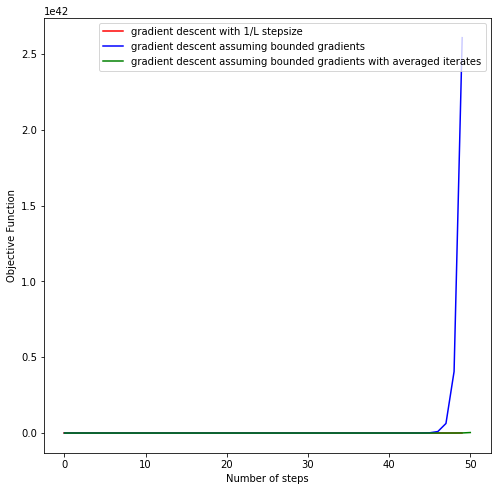

In [99]:
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')
#plt.yscale("log")
plt.plot(range(len(gradient_objectives)), gradient_objectives,'r', label='gradient descent with 1/L stepsize')
plt.plot(range(len(bd_gradient_objectives)), bd_gradient_objectives,'b', label='gradient descent assuming bounded gradients')
plt.plot(range(len(bd_gradient_objectives_averaged)), bd_gradient_objectives_averaged,'g', label='gradient descent assuming bounded gradients with averaged iterates')
plt.legend(loc='upper right')
plt.show()